In [195]:
import pandas as pd
from pathlib import Path

In [196]:
df = pd.read_csv("/Users/ansintsova/git_repos/avocado/data/vst_gene_counts.csv", index_col=0)

In [120]:
df.sample(5)
to_filter = df[df.day == 'd0'].groupby('ShortName').norm_count.median().reset_index()
to_filter = to_filter[to_filter.norm_count > 6].ShortName.values
#.ShortName.values

df= df[df.ShortName.isin(to_filter) ]

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

In [121]:
df = df.pivot(index='ShortName', columns=['SampleID'], values=['norm_count'])

In [122]:
df

norm_count                             \
SampleID          ad926_d1_dnaid2017_TV4592A ad926_d2_dnaid2017_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                  11.886294                  11.854226   
AAAACTTCATGTACAGA                  10.696090                  10.842332   
AAACGGCCGAGTTCGAG                  11.213696                  11.073523   
AAACGTCCCCACACGGG                  10.626310                  10.069505   
AAAGAAGCTATAAACTA                   9.814393                   9.352388   
...                                      ...                        ...   
ysaA                               10.910699                  10.654903   
ytfF                               10.587769                  10.797999   
ytfG                               11.888620                  11.567413   
ytfJ                               11.106575                  10.951875   
ytfM                                8.931311                   8.783584   

                                                                         \
SampleID          ad926_d3_dnaid2018_TV4592A ad926_d4_dnaid2018_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                  11.974136                  12.245235   
AAAACTTCATGTACAGA                  10.607524                  10.668782   
AAACGGCCGAGTTCGAG                  10.883439                  10.868195   
AAACGTCCCCACACGGG                  10.374190                  10.047012   
AAAGAAGCTATAAACTA                   9.024412                   9.016915   
...                                      ...                        ...   
ysaA                               10.816313                  10.816073   
ytfF                               11.098774                  11.110410   
ytfG                               11.580699                  11.515856   
ytfJ                               10.954863                  10.830158   
ytfM                                8.240940                   7.955191   

                                                                         \
SampleID          ad927_d1_dnaid2017_TV4592A ad927_d2_dnaid2017_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                   9.826515                   9.750115   
AAAACTTCATGTACAGA                   7.884177                   8.025284   
AAACGGCCGAGTTCGAG                  10.378826                  10.851953   
AAACGTCCCCACACGGG                  11.834747                  12.114093   
AAAGAAGCTATAAACTA                  10.138901                   9.124364   
...                                      ...                        ...   
ysaA                               10.119025                  10.180034   
ytfF                               12.404633                  12.383989   
ytfG                               13.358628                  13.665868   
ytfJ                                9.609138                   9.689060   
ytfM                                6.336066                   7.244845   

                                                                         \
SampleID          ad927_d3_dnaid2018_TV4592A ad927_d4_dnaid2018_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                  10.195824                  10.152325   
AAAACTTCATGTACAGA                   8.107288                   8.059852   
AAACGGCCGAGTTCGAG                  11.296149                  11.542761   
AAACGTCCCCACACGGG                  12.271515                  12.140749   
AAAGAAGCTATAAACTA                   8.913266                   8.589862   
...                                      ...                        ...   
ysaA                               10.146930                  10.265657   
ytfF                               12.469910                  12.359716   
ytfG                               13.964551            

In [188]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled = scaler.fit_transform(df)

In [32]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

Text(0, 0.5, 't-SNE feature 1')

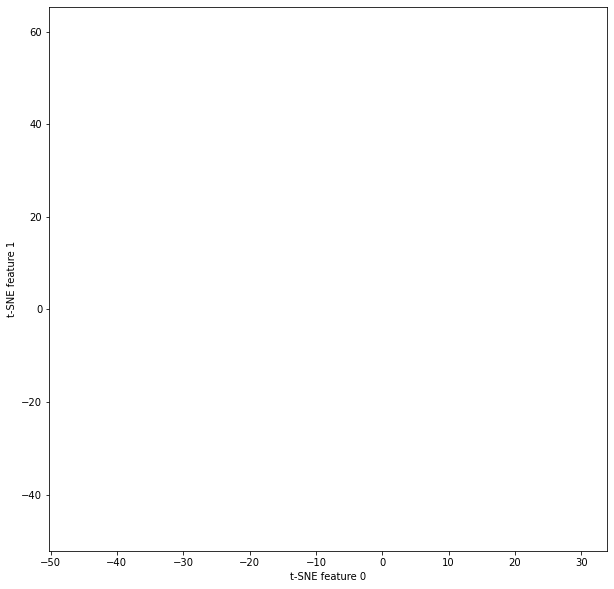

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
#plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
#plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
# for i in range(len(digits.data)):
#     # actually plot the digits as text instead of using scatter
#     plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
#              color = colors[digits.target[i]],
#              fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [245]:
df3 = df[[c for c in df.columns if 'ad926' in c[1]]]

In [250]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(df)

In [251]:
df2 = pd.DataFrame(digits_tsne, index=df.index)
df2.columns = ['x', 'y']
compare = pd.read_csv("/Users/ansintsova/git_repos/avocado/data/compare.csv", index_col=1)
compare = compare[compare.day=='d1']
#df2 = df2.merge(compare, left_index
df2 = df2.merge(compare[['median_CI_method2', 'ci_pval_method2']], left_index=True, right_index=True)

In [263]:
import chart_studio
import chart_studio.tools as tls
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import dash_bio as dashbio
import numpy as np

In [264]:
df2['ci'] = np.log2(df2.median_CI_method2)

In [265]:
px.scatter(df2, x='x', y='y', hover_data=[df2.index], color=-np.log(df2['ci_pval_method2']))

In [260]:
vst_gene_cnts = pd.read_csv("/Users/ansintsova/git_repos/avocado/data/vst_gene_counts.csv")

gene = 'gntK'
test = vst_gene_cnts[(vst_gene_cnts.ShortName == gene)]
test['dayN'] = test.day.replace({'d1':1, 'd2':2, 'd3':3, 'd4':4})
test_inoculum = vst_gene_cnts[(vst_gene_cnts.ShortName == gene)& (vst_gene_cnts.mouse == 'inoculum')]
fig = px.box(test, x='day', y="norm_count", color='day',
         hover_data=['mouse'],
             template='simple_white'
             )
fig.add_hline(y=test_inoculum.norm_count.mean(), line_width=3, line_dash="dash", annotation_text="Mean Inoculum Count")
fig.add_hline(y=5.2, line_width=3, line_dash="dash", annotation_text="Detection Limit")
fig

In [151]:

test

,day,Fitness
0,d1,0.579140
1,d2,0.390614
2,d3,0.521920
3,d4,0.323290


In [172]:
ph = df2[(df2.x>-30)&(df2.y<40)&(df2.x<-20)&(df2.y>20)].index
ph

Index(['SL1344_0342', 'SL1344_1189', 'SL1344_1469', 'SL1344_1560',
       'SL1344_1563', 'SL1344_1565', 'SL1344_2109', 'SL1344_2673',
       'SL1344_2698', 'SL1344_2710', 'SL1344_2752', 'SL1344_3057',
       'SL1344_3227', 'SL1344_3598', 'SL1344_3655', 'SL1344_3740',
       'SL1344_3745', 'SL1344_3751', 'SL1344_4014', 'SL1344_4052',
       'SL1344_4053', 'SL1344_4146', 'SL1344_4247', 'SL1344_4364',
       'SL1344_4433', 'SL1344_4453', 'SL1344_4523A', 'SL1344_RS24125',
       'SL1344_RS24445', 'SL1344_RS24650', 'SL1344_RS24675', 'SL1344_RS26430',
       'SL1344_RS27460', 'acrE', 'ampH', 'ccmF2', 'csgF', 'dbh', 'dpaL', 'ego',
       'idnK', 'ilvI', 'leuA', 'lpfC', 'mglA', 'mig-14', 'mobB', 'pilL',
       'pipB2', 'siiA', 'sprB', 'spvD', 'stcD', 'stfC', 'tnp', 'traY', 'uxaC',
       'virK', 'ybfM', 'yddX', 'ydiV', 'yeaJ', 'yeaS', 'yeeN', 'yeeX', 'yigN',
       'yijF', 'yjgN', 'yneA', 'ypfG'],
      dtype='object')

In [173]:
test = gene_fitness_annotated[gene_fitness_annotated.ShortName.isin(list(ph))].groupby(['ShortName', 'day']).Fitness.median().reset_index()


In [169]:
test

,ShortName,day,Fitness
0,AAAGAGGTCACGAGCTG,d1,1.197874
1,AAAGAGGTCACGAGCTG,d2,1.089207
2,AAAGAGGTCACGAGCTG,d3,0.828976
3,AAAGAGGTCACGAGCTG,d4,1.075707
4,AAGAAAGAGTGATTGTG,d1,0.798558
...,...,...,...
303,yihG,d4,1.805418
304,yqjK,d1,0.988686
305,yqjK,d2,0.793141
306,yqjK,d3,1.035284


In [199]:
gene_fitness_annotated = pd.read_csv("/Users/ansintsova/git_repos/avocado/data/gene_fitness_annotated.csv")
gene = 'mig-14'
#test = gene_fitness_annotated[gene_fitness_annotated.ShortName.isin(list(ph))].groupby('day').Fitness.median().reset_index()
#test = gene_fitness_annotated[gene_fitness_annotated.ShortName == gene]
#test['dayN'] = test.day.replace({'d1':1, 'd2':2, 'd3':3, 'd4':4})
fig = px.line(test, x='day', y="Fitness", 
         
             template='simple_white', log_y=True, 
             )
fig.add_hline(y=1, line_width=3, line_dash="dash", annotation_text="Fitness")
fig.update_traces(mode='markers+lines')
fig.update_yaxes(tickvals=[0.01, 0.1, 0.5,1,2, 10, 100])

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'ShortName', 'SampleID', 'norm_count', 'mouse', 'day', 'dnaid', 'experiment', 'dayN'] but received: Fitness

In [203]:
df = gene_fitness_annotated.pivot(index='ShortName', columns=['sampleID'], values=['Fitness'])

In [204]:
df

Fitness                             \
sampleID          ad926_d1_dnaid2017_TV4592A ad926_d2_dnaid2017_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                   1.119034                   1.094435   
AAAACGCAGCGCTTGCC                   1.898760                   1.812084   
AAAACTTCATGTACAGA                   0.938151                   1.038236   
AAAATTCTTTCTCCCCG                   1.000000                   1.000000   
AAACAATAGGGGGGTAG                   1.007408                   0.813069   
...                                      ...                        ...   
ytfF                                0.938146                   1.085316   
ytfG                                0.918936                   0.735516   
ytfJ                                0.882163                   0.792464   
ytfM                                0.496746                   0.493012   
zwf                                 1.334353                   1.355407   

                                                                         \
sampleID          ad926_d3_dnaid2018_TV4592A ad926_d4_dnaid2018_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                   1.189286                   1.435143   
AAAACGCAGCGCTTGCC                   0.804508                   0.804508   
AAAACTTCATGTACAGA                   0.882291                   0.920560   
AAAATTCTTTCTCCCCG                   1.000000                   1.000000   
AAACAATAGGGGGGTAG                   0.973590                   1.122421   
...                                      ...                        ...   
ytfF                                1.336899                   1.347725   
ytfG                                0.742321                   0.709695   
ytfJ                                0.794107                   0.728348   
ytfM                                0.339419                   0.291279   
zwf                                 0.962611                   0.962611   

                                                                         \
sampleID          ad927_d1_dnaid2017_TV4592A ad927_d2_dnaid2017_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                   0.268403                   0.254559   
AAAACGCAGCGCTTGCC                   1.316736                   1.585783   
AAAACTTCATGTACAGA                   0.133599                   0.147326   
AAAATTCTTTCTCCCCG                   1.000000                   1.185399   
AAACAATAGGGGGGTAG                   0.995898                   1.090835   
...                                      ...                        ...   
ytfF                                3.305225                   3.258267   
ytfG                                2.545667                   3.149853   
ytfJ                                0.312446                   0.330243   
ytfM                                0.120405                   0.204477   
zwf                                 1.216487                   1.185391   

                                                                         \
sampleID          ad927_d3_dnaid2018_TV4592A ad927_d4_dnaid2018_TV4592A   
ShortName                                                                 
AAAAACATGCCACACTG                   0.346706                   0.336408   
AAAACGCAGCGCTTGCC                   0.804508                   0.804508   
AAAACTTCATGTACAGA                   0.155943                   0.150899   
AAAATTCTTTCTCCCCG                   1.000000                   1.000000   
AAACAATAGGGGGGTAG                   1.096420                   1.212548   
...                                      ...                        ...   
ytfF                                3.458212                   3.203906   
ytfG                                3.874386                   3.572350   
ytfJ                                0.394426               